In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as sk
import Final_project as FP 
import Test as t
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

In [2]:
Trial_1 = FP.clean_data("Trial1")
Trial_2 = FP.clean_data("Trial2")

In [3]:
#### We are going to average 10 signals here. Uncomment 

cz_fz = []
for i in range(0,10):
    gaussian_noise = 0 #np.random.normal(0,.001,Trial_1[i][0].shape)
    gaussian_noise = 0 # np.random.normal(0,.001,Trial_1[i][1].shape)
    cz_fz.append(Trial_1[np.random.randint(0,83,1)[0]][0]+gaussian_noise)


In [4]:
#### Compute KPCA gaussian

### I chose the only parameter for the gaussian kernel to be sigma=10
temp = []
sigma = 10
eigenvalues,eigenvectors = np.linalg.eig(FP.Gram_Matrix(FP.K(cz_fz,sigma)))

for z in cz_fz:
    p = FP.inverse_function(z,10,eigenvalues,eigenvectors,cz_fz,sigma)
    temp.append(p)

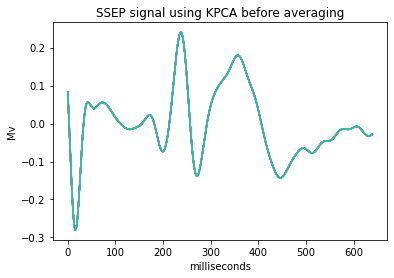

In [10]:
#### Calculate mean of K
temp = np.array(temp)
trials = len(cz_fz)
average = np.mean(temp,axis=0)
x = np.arange(0,len(average))/6.4
plt.xlabel("milliseconds")
plt.ylabel("Mv")
plt.plot(np.transpose(temp))
plt.title("SSEP signal using KPCA before averaging")
plt.savefig("SSEP KPCA cz_fz")

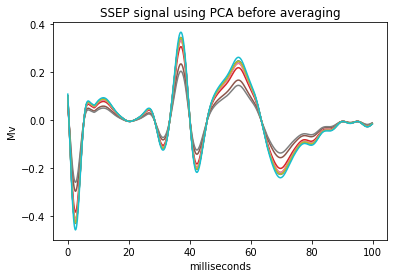

In [13]:
#### Compute PCA
pca = FP.PCA_(cz_fz)

#### Calculate mean of PCA
p = np.mean(temp,axis=0)
pca_ = np.transpose(pca)
x = np.arange(0,len(p))/6.4
plt.xlabel("milliseconds")
plt.ylabel("Mv")
plt.plot(x,pca_)
plt.title("SSEP signal using PCA before averaging")
plt.savefig("PCA cz_fz")

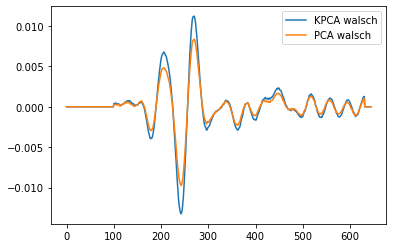

In [12]:
### walsch convolution
gauss = FP.walsch_convolution(average)
pca_walsch = FP.walsch_convolution(np.mean(pca,axis=0))

## Moving average
gauss = FP.clip(np.convolve([1,1,1],gauss),100,630)
pca_walsch = np.convolve([1,1,1],pca_walsch)
plt.plot(FP.clip(pca_walsch,100,630),label="KPCA walsch")
plt.plot(FP.clip(gauss,100,630),label="PCA walsch")
plt.legend()
plt.savefig("cz_fz walsch")
#plt.plot(FP.clip(pca_walsch,100,630))

In [8]:
### Clip ends of vector
gauss = FP.clip(gauss,200,350)
pca = FP.clip(pca_walsch,200,350)

gauss_max = np.argmax(gauss)
gauss_min = np.argmin(gauss)

pca_max = np.argmax(pca)
pca_min = np.argmin(pca)

In [9]:
print("N45 Time, gaussian kernel",FP.percent_time_difference(gauss_max/6.4,42.7))
print("P37 time, gaussian kernel",FP.percent_time_difference(gauss_min/6.4,36.9))

print("N45 Time, PCA",FP.percent_time_difference(pca_max/6.4,42.7))
print("P37 time, PCA",FP.percent_time_difference(pca_min/6.4,36.9))



N45 Time, gaussian kernel 1.207480488882351
P37 time, gaussian kernel 2.442697005186552
N45 Time, PCA 1.207480488882351
P37 time, PCA 2.442697005186552


In [20]:
clinical_mean = np.mean(cz_fz,axis=0)
clinical_max = np.argmax(FP.clip(FP.walsch_convolution(np.mean(cz_fz,axis=0)),200,350))
clinical_min = np.argmin(FP.clip(FP.walsch_convolution(np.mean(cz_fz,axis=0)),200,350))

In [21]:
np.abs(FP.peak_to_peak_percentage(average[gauss_max]-average[gauss_min],clinical_mean[clinical_max]-clinical_mean[clinical_min]))


32.44610824032321

In [22]:
np.abs(FP.peak_to_peak_percentage(p[gauss_max]-p[gauss_min],clinical_mean[clinical_max]-clinical_mean[clinical_min]))

32.44610824032321